In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo

# Load the dataset
dataset = fetch_ucirepo(id=544)

# Data (as pandas dataframes)
X = dataset.data.features
y = dataset.data.targets['NObeyesdad']

In [2]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


### Split the data into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### encoding categorical columns with one hot encoder

In [4]:
# Preprocess categorical variables
categorical_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

### train using random forest

In [5]:
rf = RandomForestClassifier(n_estimators=527, max_depth=992 , random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=992, n_estimators=527,
                                        random_state=42))])

eval

In [6]:
y_pred = pipeline.predict(X_test)

# Print the overall classification report
print("Combined Model Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Combined Model Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.952     0.943     0.948       106
      Normal_Weight      0.793     0.910     0.847       122
     Obesity_Type_I      0.977     0.934     0.955       137
    Obesity_Type_II      0.983     0.992     0.987       119
   Obesity_Type_III      1.000     0.993     0.996       138
 Overweight_Level_I      0.896     0.848     0.872       112
Overweight_Level_II      0.943     0.901     0.922       111

           accuracy                          0.934       845
          macro avg      0.935     0.932     0.932       845
       weighted avg      0.937     0.934     0.934       845



In [7]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1544,Male,23.963649,1.792998,116.102615,yes,yes,1.994679,3.000000,Sometimes,no,2.000000,no,0.966617,0.739006,Sometimes,Public_Transportation
2062,Female,25.994949,1.593321,110.168166,yes,yes,3.000000,3.000000,Sometimes,no,2.447306,no,0.000454,0.486558,Sometimes,Public_Transportation
457,Female,19.000000,1.500000,45.000000,no,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
777,Female,29.081070,1.674568,71.602622,yes,yes,2.000000,3.000000,Sometimes,no,1.701835,no,1.682271,0.000000,Sometimes,Automobile
1055,Male,33.000000,1.850000,97.920350,yes,yes,2.000000,3.000000,Sometimes,no,1.117464,no,1.000000,0.663649,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Male,32.290160,1.754956,120.098812,yes,yes,2.967300,3.000000,Sometimes,no,2.530035,no,0.955317,1.339232,Sometimes,Automobile
1095,Male,23.000000,1.718981,81.669950,yes,yes,2.000000,1.729553,Sometimes,no,1.400247,no,0.887923,1.011983,Sometimes,Public_Transportation
1130,Female,22.989846,1.650000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.146919,2.000000,no,Public_Transportation
1294,Female,23.000000,1.628168,84.497980,yes,yes,2.058687,2.962004,Sometimes,no,2.010596,no,0.851059,0.630866,no,Public_Transportation


radom forest really good even without feature selection

# Neural Network

In [2]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Make sure we are using CUDA for fast computing

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_properties(torch.cuda.current_device()))

True
NVIDIA GeForce RTX 3060 Laptop GPU
_CudaDeviceProperties(name='NVIDIA GeForce RTX 3060 Laptop GPU', major=8, minor=6, total_memory=6143MB, multi_processor_count=30)


In [4]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

NVIDIA GeForce RTX 3060 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


# Import Data

In [7]:
from ucimlrepo import fetch_ucirepo
# Load the dataset
dataset = fetch_ucirepo(id=544)

# Data (as pandas dataframes)
X = dataset.data.features
y = dataset.data.targets['NObeyesdad'] # target

In [13]:
X.shape

(2111, 16)

In [14]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


# Split into test and traing datasets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Plot naturally obtained data

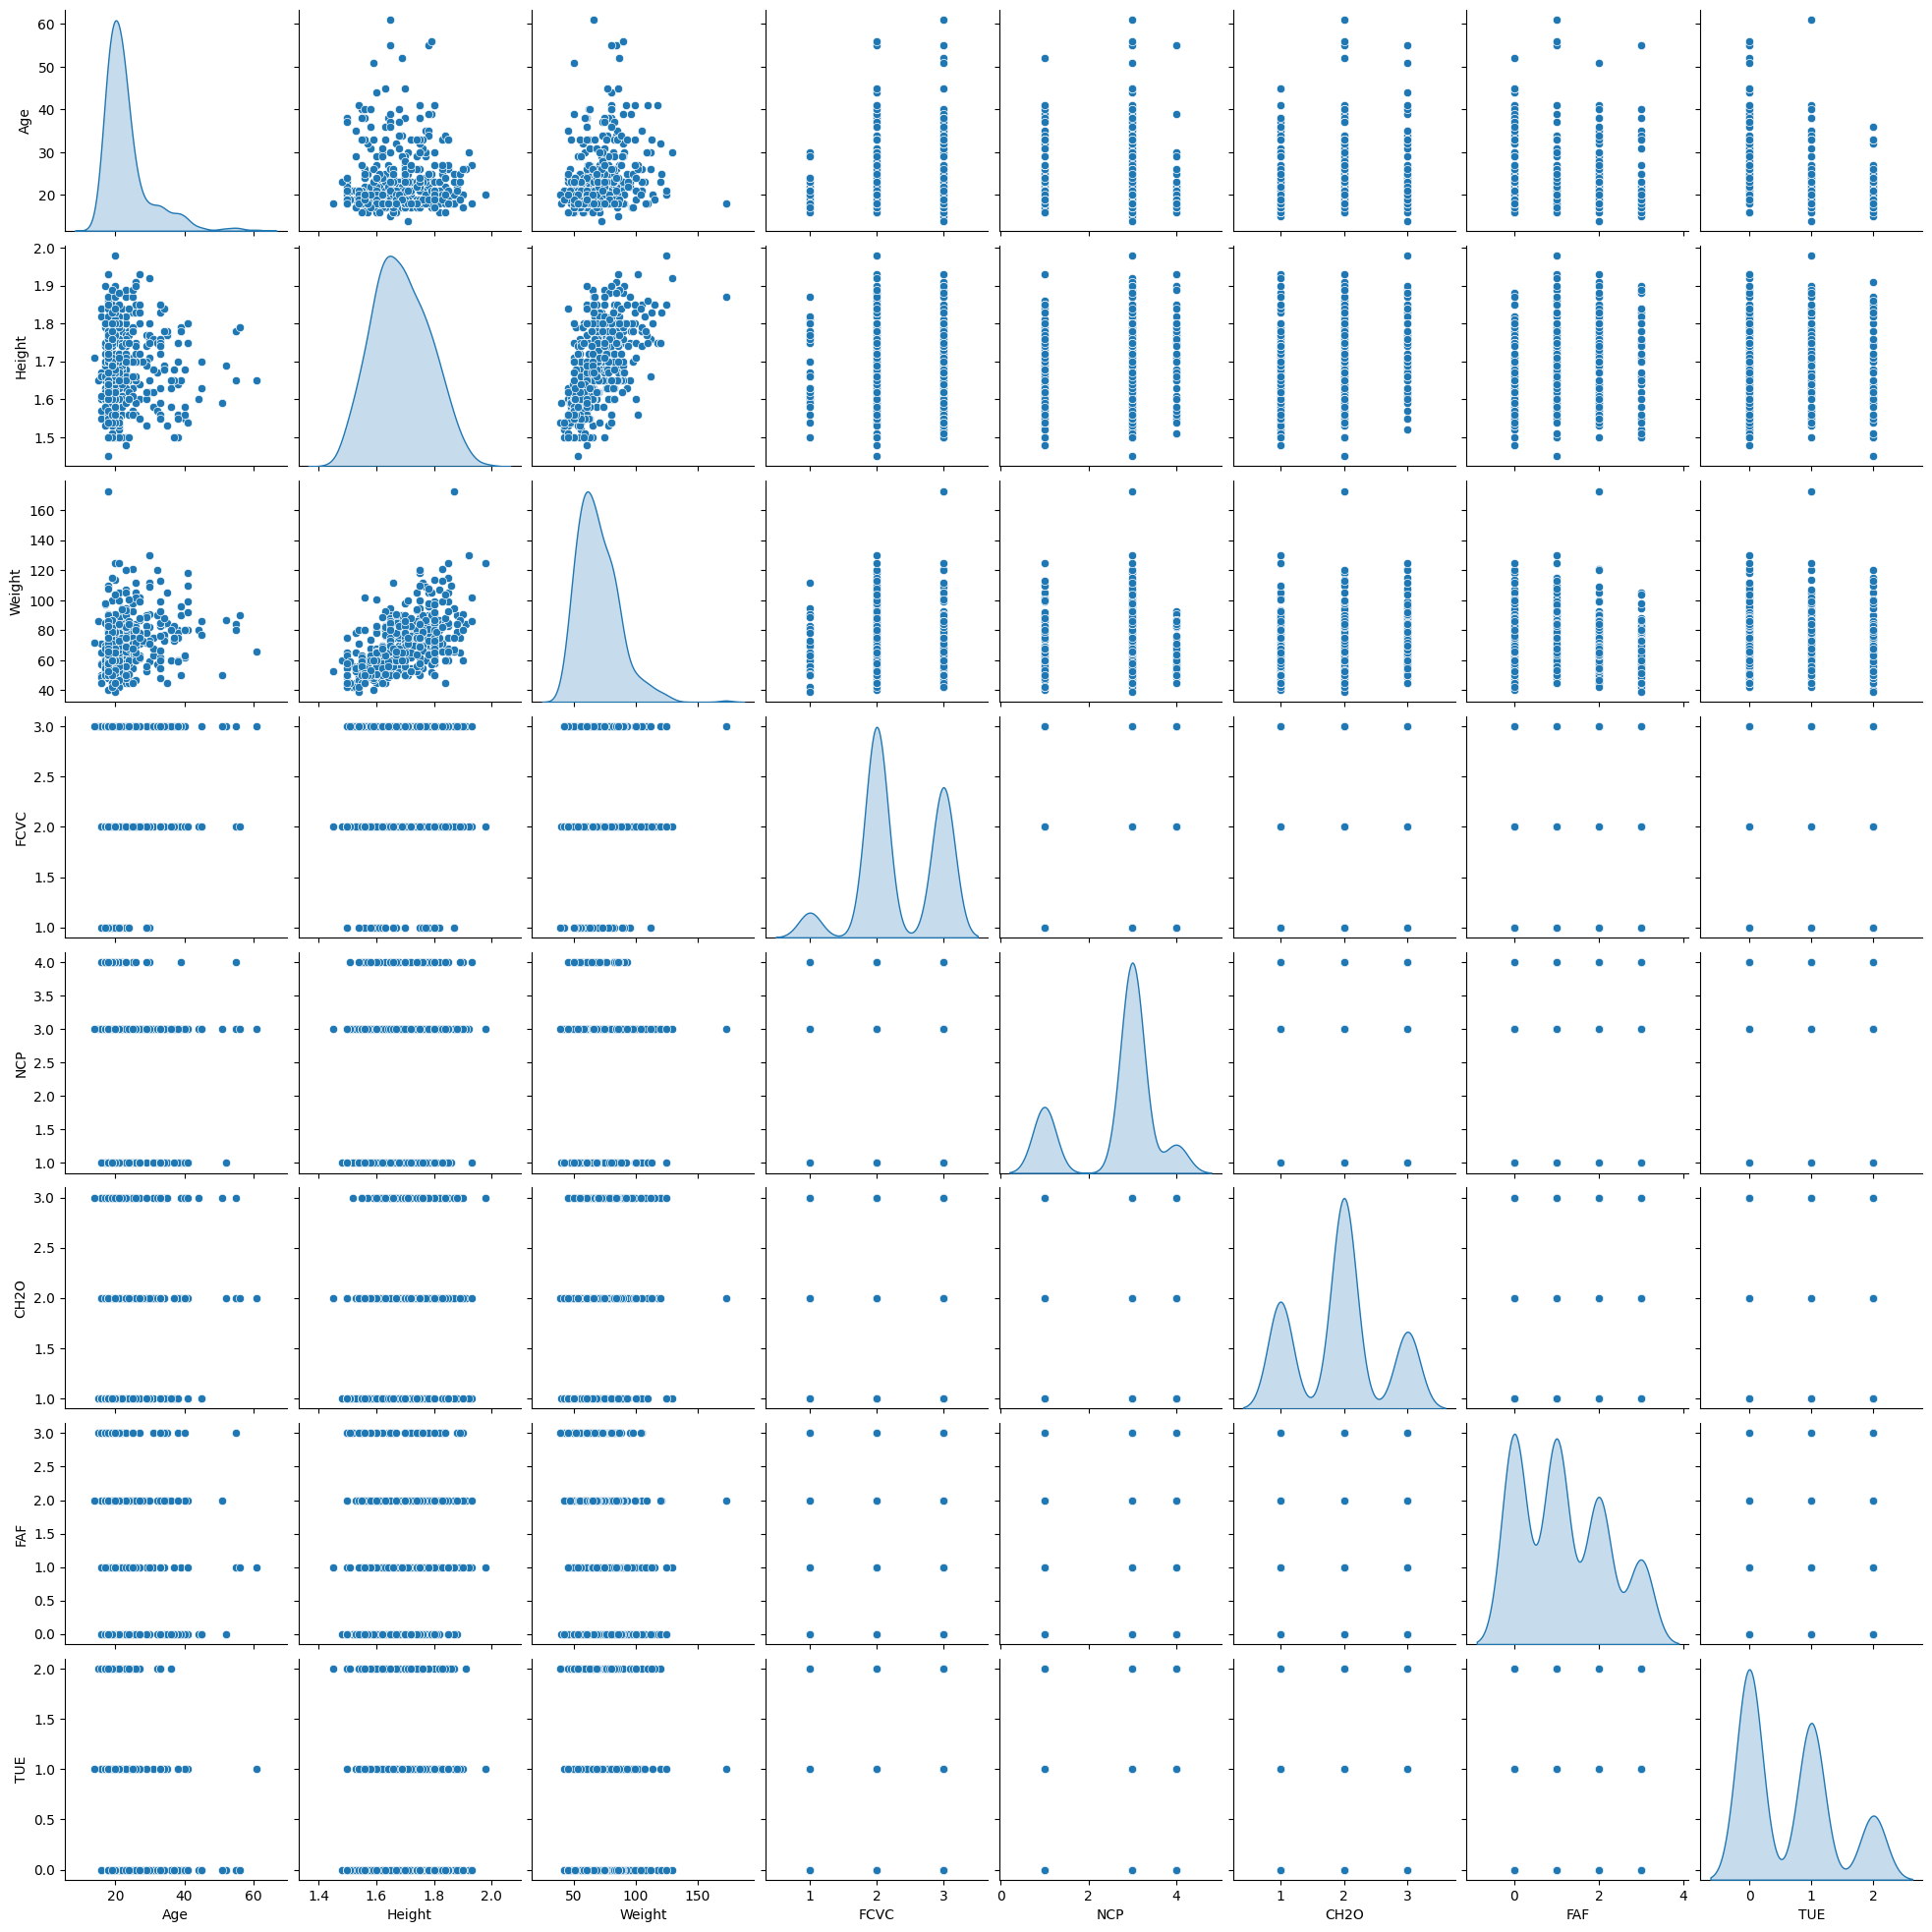

In [16]:
sns.pairplot(X[:498], diag_kind="kde")
plt.show()

# Encode categorical features

In [17]:
# X.select_dtypes(include=['object'])

In [18]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1544,Male,23.963649,1.792998,116.102615,yes,yes,1.994679,3.000000,Sometimes,no,2.000000,no,0.966617,0.739006,Sometimes,Public_Transportation
2062,Female,25.994949,1.593321,110.168166,yes,yes,3.000000,3.000000,Sometimes,no,2.447306,no,0.000454,0.486558,Sometimes,Public_Transportation
457,Female,19.000000,1.500000,45.000000,no,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
777,Female,29.081070,1.674568,71.602622,yes,yes,2.000000,3.000000,Sometimes,no,1.701835,no,1.682271,0.000000,Sometimes,Automobile
1055,Male,33.000000,1.850000,97.920350,yes,yes,2.000000,3.000000,Sometimes,no,1.117464,no,1.000000,0.663649,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Male,32.290160,1.754956,120.098812,yes,yes,2.967300,3.000000,Sometimes,no,2.530035,no,0.955317,1.339232,Sometimes,Automobile
1095,Male,23.000000,1.718981,81.669950,yes,yes,2.000000,1.729553,Sometimes,no,1.400247,no,0.887923,1.011983,Sometimes,Public_Transportation
1130,Female,22.989846,1.650000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.146919,2.000000,no,Public_Transportation
1294,Female,23.000000,1.628168,84.497980,yes,yes,2.058687,2.962004,Sometimes,no,2.010596,no,0.851059,0.630866,no,Public_Transportation


In [19]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Create a list to store the results
distinct_values_list = []

# Get distinct values for each categorical column and concatenate them into a single string
for col in categorical_cols:
    distinct_values = X[col].unique()
    distinct_values_str = ', '.join(map(str, distinct_values))
    distinct_values_list.append({'Column': col, 'Distinct Values': distinct_values_str})

# Create DataFrame from the list
distinct_values_df = pd.DataFrame(distinct_values_list)

show categorical columns and their values

In [20]:
distinct_values_df

,Column,Distinct Values
0,Gender,"Female, Male"
1,family_history_with_overweight,"yes, no"
2,FAVC,"no, yes"
3,CAEC,"Sometimes, Frequently, Always, no"
4,SMOKE,"no, yes"
5,SCC,"no, yes"
6,CALC,"no, Sometimes, Frequently, Always"
7,MTRANS,"Public_Transportation, Walking, Automobile, Mo..."


encode using One Hot Encoding

In [21]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessor for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

In [22]:
# Get the column names for the transformed data
onehotencoder = preprocessor.named_transformers_['onehot']
encoded_categorical_cols = onehotencoder.get_feature_names_out(categorical_cols)
all_columns = np.hstack([encoded_categorical_cols, X.drop(columns=categorical_cols).columns])

# Create a DataFrame with the transformed data
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)

check data after transforming

In [23]:
X_transformed_df

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [24]:
X_transformed.shape

(2111, 31)

### Encode target column

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
set(y_encoded) # se if it made 7 distinct classes

{0, 1, 2, 3, 4, 5, 6}

# show features relations after transforming

In [26]:
# # Plot using pairplot
# sns.pairplot(X, diag_kind="kde")
# plt.show()

# finding best Model params

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

convert data to tensors

In [106]:
# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_transformed, dtype=torch.float32)
# X_tensor = torch.tensor(X, dtype=torch.float32)

# Convert target to PyTorch tensor
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Verify the shapes of the tensors
print("Feature tensor shape:", X_tensor.shape)
print("Target tensor shape:", y_tensor.shape)

Feature tensor shape: torch.Size([2111, 31])
Target tensor shape: torch.Size([2111])


In [29]:
X_tensor.shape

torch.Size([2111, 31])

In [33]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super().__init__()
        self.fc1 = nn.Linear(31, 64)  # 15 input features
        self.act = activation()
        self.fc2 = nn.Linear(64, 7)   # 7 output classes

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x

param grid

In [31]:
param_grid = {
    'module__activation': [nn.Identity, nn.ReLU, nn.ELU, nn.ReLU6,
                           nn.GELU, nn.Softplus, nn.Softsign, nn.Tanh,
                           nn.Sigmoid, nn.Hardsigmoid]
}

find best params using grid search

In [34]:
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetClassifier

model = NeuralNetClassifier(
    module=NeuralNetwork,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adamax,
    max_epochs=100,
    batch_size=10,
    verbose=0
)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_tensor, y_tensor)


GridSearchCV(cv=3,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.NeuralNetwork'>,
),
             n_jobs=-1,
             param_grid={'module__activation': [<class 'torch.nn.modules.linear.Identity'>,
                                                <class 'torch.nn.modules.activation.ReLU'>,
                                                <class 'torch.nn.modules.activation.ELU'>,
                                                <class 'torch.nn.modules.activation.ReLU6'>,
                                                <class 'torch.nn.modules.activation.GELU'>,
                                                <class 'torch.nn.modules.activation.Softplus'>,
                                                <class 'torch.nn.modules.activation.Softsign'>,
                                                <class 'torch.nn.modules.activation.Tanh'>,
                                                <class 'torch.nn.modules.activation.Sigmoid'>,
                                                <class 'torch.nn.modules.activation.Hardsigmoid'>]},
             scoring='accuracy')

In [35]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.548084 using {'module__activation': <class 'torch.nn.modules.activation.Softplus'>}
0.347217 (0.069127) with: {'module__activation': <class 'torch.nn.modules.linear.Identity'>}
0.249173 (0.066170) with: {'module__activation': <class 'torch.nn.modules.activation.ReLU'>}
0.492178 (0.012726) with: {'module__activation': <class 'torch.nn.modules.activation.ELU'>}
0.280865 (0.157536) with: {'module__activation': <class 'torch.nn.modules.activation.ReLU6'>}
0.303715 (0.118672) with: {'module__activation': <class 'torch.nn.modules.activation.GELU'>}
0.548084 (0.013289) with: {'module__activation': <class 'torch.nn.modules.activation.Softplus'>}
0.483657 (0.001740) with: {'module__activation': <class 'torch.nn.modules.activation.Softsign'>}
0.426357 (0.047681) with: {'module__activation': <class 'torch.nn.modules.activation.Tanh'>}
0.505920 (0.010571) with: {'module__activation': <class 'torch.nn.modules.activation.Sigmoid'>}
0.153482 (0.000103) with: {'module__activation': <class 'tor

best activation: softsign

## batch size


In [104]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(31, 40)  # 15 input features
        self.act = nn.Softsign()
        self.fc2 = nn.Linear(40, 7)   # 7 output classes

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x

In [107]:
# create model with skorch
model = NeuralNetClassifier(
    module=NeuralNetwork,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
    max_epochs=100,
    verbose=0
)
 
# define the grid search parameters
param_grid = {
    'batch_size': [20, 40, 60, 80]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_tensor, y_tensor)
 
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.712946 using {'batch_size': 60}
0.302223 (0.015504) with: {'batch_size': 20}
0.543779 (0.061484) with: {'batch_size': 40}
0.712946 (0.019915) with: {'batch_size': 60}
0.683147 (0.145600) with: {'batch_size': 80}


bs: 80

## Optimization Algorithm

In [40]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(31, 64)  # 15 input features
        self.act = nn.Softsign()
        self.fc2 = nn.Linear(64, 7)   # 7 output classes

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x

In [41]:
model = NeuralNetClassifier(
    module=NeuralNetwork,
    criterion=nn.CrossEntropyLoss,
    max_epochs=100,
    batch_size=80,
    verbose=0
)

param_grid = {
    'optimizer': [optim.SGD, optim.RMSprop, optim.Adagrad, optim.Adadelta,
                  optim.Adam, optim.Adamax, optim.NAdam],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_tensor, y_tensor)
 
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.768377 using {'optimizer': <class 'torch.optim.adamax.Adamax'>}
0.171950 (0.017102) with: {'optimizer': <class 'torch.optim.sgd.SGD'>}
0.493135 (0.012251) with: {'optimizer': <class 'torch.optim.rmsprop.RMSprop'>}
0.570349 (0.044837) with: {'optimizer': <class 'torch.optim.adagrad.Adagrad'>}
0.219313 (0.021800) with: {'optimizer': <class 'torch.optim.adadelta.Adadelta'>}
0.585084 (0.111323) with: {'optimizer': <class 'torch.optim.adam.Adam'>}
0.768377 (0.040530) with: {'optimizer': <class 'torch.optim.adamax.Adamax'>}
0.646145 (0.036455) with: {'optimizer': <class 'torch.optim.nadam.NAdam'>}


best: Adamax

## num of neurons

In [42]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_neurons):
        super().__init__()
        self.fc1 = nn.Linear(31, n_neurons)  # 15 input features
        self.act = nn.Softsign()
        # self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(n_neurons, 7)   # 7 output classes

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        # x = self.dropout(x)
        x = self.fc2(x)
        return x

In [43]:
model = NeuralNetClassifier(
    module=NeuralNetwork,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adamax,
    max_epochs=100,
    batch_size=80,
    verbose=0
)

param_grid = {
    'module__n_neurons': [15, 20, 25, 30, 40, 60, 70, 100]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_tensor, y_tensor)
 
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.776436 using {'module__n_neurons': 60}
0.722895 (0.036356) with: {'module__n_neurons': 15}
0.725749 (0.049675) with: {'module__n_neurons': 20}
0.736616 (0.034911) with: {'module__n_neurons': 25}
0.733790 (0.049983) with: {'module__n_neurons': 30}
0.740894 (0.040789) with: {'module__n_neurons': 40}
0.776436 (0.066319) with: {'module__n_neurons': 60}
0.769334 (0.064926) with: {'module__n_neurons': 70}
0.768362 (0.043257) with: {'module__n_neurons': 100}


100 neurons?, 60

## neurons and layers

In [47]:
import math

class NeuralNetwork(nn.Module):
    def __init__(self, n_layers=1, n_neurons=60):
        super().__init__()
        self.hidden_layers = nn.ModuleList()
        self.act = nn.Softsign()
        
        # Initialize the first hidden layer
        self.hidden_layers.append(nn.Linear(31, n_neurons))
        
        for _ in range(n_layers - 1):
            n_neurons = math.floor(math.sqrt(n_neurons))
            self.hidden_layers.append(nn.Linear(self.hidden_layers[-1].out_features, n_neurons))
        
        # Output layer
        self.output_layer = nn.Linear(self.hidden_layers[-1].out_features, 7)  # 7 output classes

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.act(layer(x))
        x = self.output_layer(x)
        return x

In [49]:
model = NeuralNetClassifier(
    module=NeuralNetwork,
    max_epochs=200,
    batch_size=80,
    verbose=0
)

param_grid = {
    'module__n_layers': [1, 2, 3],  # Try different numbers of layers
    'module__n_neurons': [20, 40, 60, 80],  # Try different numbers of neurons per layer
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_tensor, y_tensor)
 
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.162011 using {'module__n_layers': 1, 'module__n_neurons': 20}
0.162011 (0.006083) with: {'module__n_layers': 1, 'module__n_neurons': 20}
0.162011 (0.006083) with: {'module__n_layers': 1, 'module__n_neurons': 40}
0.157737 (0.011959) with: {'module__n_layers': 1, 'module__n_neurons': 60}
0.149214 (0.005932) with: {'module__n_layers': 1, 'module__n_neurons': 80}
0.148266 (0.007273) with: {'module__n_layers': 2, 'module__n_neurons': 20}
0.138324 (0.001861) with: {'module__n_layers': 2, 'module__n_neurons': 40}
0.157743 (0.005976) with: {'module__n_layers': 2, 'module__n_neurons': 60}
0.157749 (0.006138) with: {'module__n_layers': 2, 'module__n_neurons': 80}
0.152061 (0.012228) with: {'module__n_layers': 3, 'module__n_neurons': 20}
0.162011 (0.006083) with: {'module__n_layers': 3, 'module__n_neurons': 40}
0.139269 (0.002980) with: {'module__n_layers': 3, 'module__n_neurons': 60}
0.147800 (0.008087) with: {'module__n_layers': 3, 'module__n_neurons': 80}


# Train and Test best Network

In [110]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_neurons=40):
        super().__init__()
        self.fc1 = nn.Linear(31, n_neurons) # 31 input features 
        self.act = nn.Softsign()
        self.fc2 = nn.Linear(n_neurons, 7) # 7 output classes
        self.epoch = 0

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x

In [257]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_neurons=60):
        super().__init__()
        self.fc1 = nn.Linear(31, n_neurons) # 31 input features 
        second_layer_neurons = math.floor(math.sqrt(n_neurons))
        self.fc2 = nn.Linear(n_neurons, second_layer_neurons)
        self.fc3 = nn.Linear(second_layer_neurons, 7) # 7 output classes
        self.act = nn.Softsign()
        self.epoch = 0

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.act(x)
        x = self.fc3(x)
        return x

In [258]:
# Move model and data to GPU if available
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)

In [259]:
device

device(type='cuda')

In [260]:
# Convert the processed data to PyTorch tensors
X_tensor = torch.tensor(X_transformed, dtype=torch.float32)
# X_tensor = torch.tensor(X, dtype=torch.float32)

# Convert target to PyTorch tensor
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Verify the shapes of the tensors
print("Feature tensor shape:", X_tensor.shape)
print("Target tensor shape:", y_tensor.shape)

Feature tensor shape: torch.Size([2111, 31])
Target tensor shape: torch.Size([2111])


In [261]:
# Move X_tensor and y_tensor to the same device as the model
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.4, random_state=42)

# Create DataLoader for batch training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)

y_test = y_test.cpu().numpy()

# for plot
accuracy_list = []

In [262]:
print("Feature tensor shape:", X_tensor.shape)
print("Target tensor shape:", y_tensor.shape)

Feature tensor shape: torch.Size([2111, 31])
Target tensor shape: torch.Size([2111])


In [263]:
print(torch.cuda.memory_allocated(device=device))
print(torch.cuda.memory_reserved(device=device))

17679360
23068672


### Define loss function and optimizer

In [287]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=0.001)

higher learining rate at the begining (0.01) can reduce number of epochs needed

## train and test loop

In [304]:
# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set the model to train mode
    running_loss = 0.0
    model.epoch += 1

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)

    # Move predicted labels back to CPU for comparison
    predicted = predicted.cpu().numpy()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted)
    accuracy_list.append(accuracy)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], total: {model.epoch},  Loss: {epoch_loss:.4f}, acc: {accuracy:.4f}")



Epoch [1/50], total: 851,  Loss: 0.0720, acc: 0.9065
Epoch [2/50], total: 852,  Loss: 0.0720, acc: 0.9077
Epoch [3/50], total: 853,  Loss: 0.0725, acc: 0.9053
Epoch [4/50], total: 854,  Loss: 0.0756, acc: 0.9053
Epoch [5/50], total: 855,  Loss: 0.0704, acc: 0.9053
Epoch [6/50], total: 856,  Loss: 0.0686, acc: 0.9041
Epoch [7/50], total: 857,  Loss: 0.0709, acc: 0.9124
Epoch [8/50], total: 858,  Loss: 0.0750, acc: 0.9006
Epoch [9/50], total: 859,  Loss: 0.0697, acc: 0.9065
Epoch [10/50], total: 860,  Loss: 0.0683, acc: 0.9077
Epoch [11/50], total: 861,  Loss: 0.0702, acc: 0.9053
Epoch [12/50], total: 862,  Loss: 0.0701, acc: 0.9077
Epoch [13/50], total: 863,  Loss: 0.0675, acc: 0.9065
Epoch [14/50], total: 864,  Loss: 0.0703, acc: 0.9089
Epoch [15/50], total: 865,  Loss: 0.0682, acc: 0.9030
Epoch [16/50], total: 866,  Loss: 0.0684, acc: 0.9041
Epoch [17/50], total: 867,  Loss: 0.0703, acc: 0.9018
Epoch [18/50], total: 868,  Loss: 0.0706, acc: 0.9089
Epoch [19/50], total: 869,  Loss: 0.0

In [305]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


# Plot the accuracy over epochs

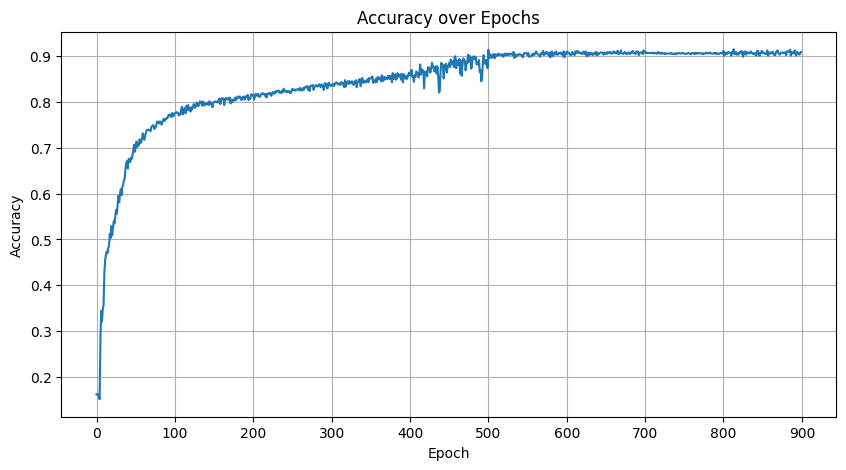

In [314]:
plt.figure(figsize=(10, 5))
plt.plot(range(model.epoch), accuracy_list)
tick_frequency = 400  # Adjust the frequency as needed
plt.xticks(range(0, model.epoch+1, 100))
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

after 500 epochs learning rate was adjusted from 0.01 to 0.001

and between 700 and 800 it was 0.0001

# Accuracy for each class

In [313]:
# Evaluate the model on the test set for class-wise accuracy
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(X_test.to(device))
    _, predicted = torch.max(outputs, 1)

# Move predicted labels back to CPU for comparison
predicted = predicted.cpu().numpy()

# Print the classification report for class-wise accuracy
class_report = classification_report(y_test, predicted, target_names=label_encoder.classes_)
print(class_report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.94      0.92       106
      Normal_Weight       0.86      0.77      0.81       122
     Obesity_Type_I       0.92      0.96      0.94       137
    Obesity_Type_II       0.97      0.99      0.98       119
   Obesity_Type_III       1.00      0.99      1.00       138
 Overweight_Level_I       0.82      0.85      0.83       112
Overweight_Level_II       0.86      0.84      0.85       111

           accuracy                           0.91       845
          macro avg       0.90      0.91      0.90       845
       weighted avg       0.91      0.91      0.91       845



# conf matrix

In [1]:
y_test.shape

NameError: name 'y_test' is not defined

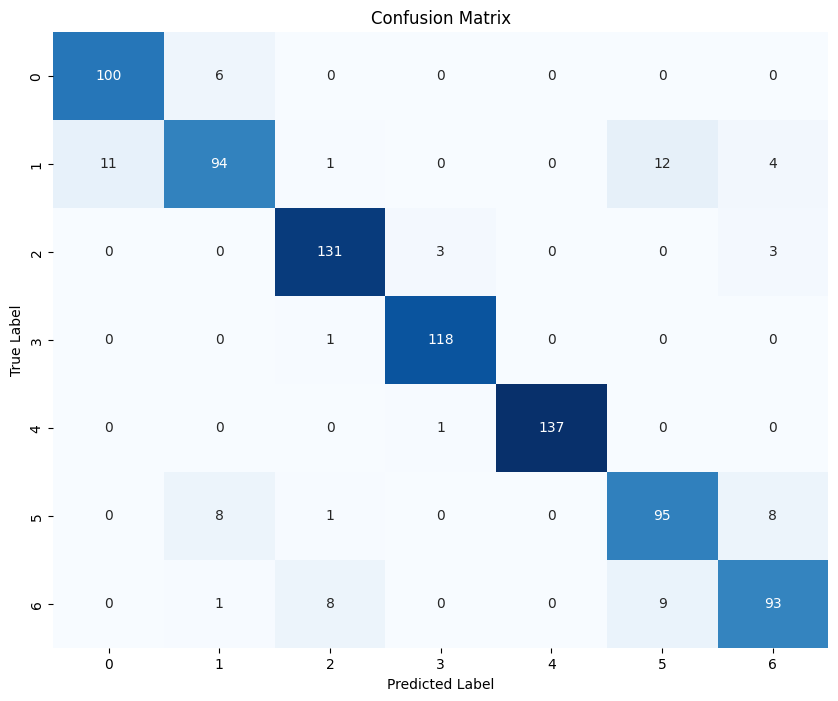

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
